# Trying out a few maps

In [33]:
import osmnx as ox
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
places = ['Tarragona, Spain',
          'Barcelona, Spain',
          'Seville, Spain',
          'Tossa de Mar, Spain',
          'Venice, Italy',
          'New York, NY, USA']
mapps = []
for place in places:
    mapps.append(ox.graph_from_place(place, network_type='drive'))

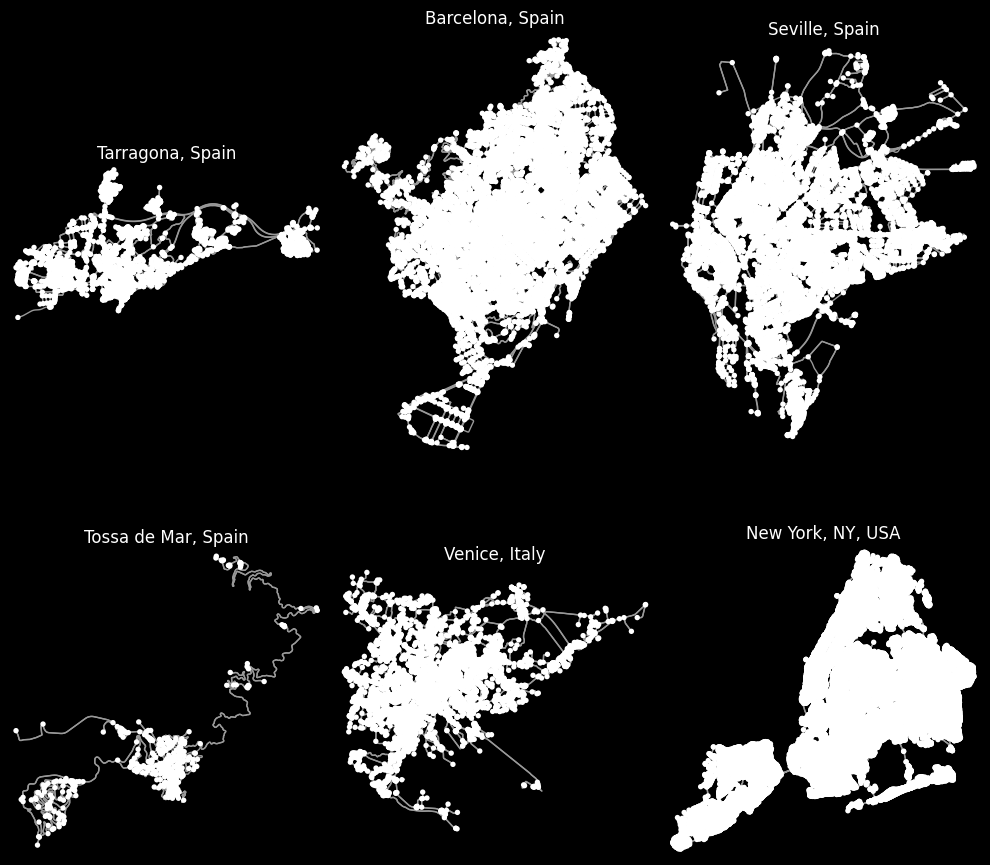

In [22]:
fig, axs = plt.subplots(2, 3, figsize=(10, 10))
for mapp, ax, place in zip(mapps, axs.flatten(), places):
    ox.plot_graph(mapp, ax=ax, show=False, close=False)
    ax.set_title(place)
plt.tight_layout()
plt.show()

In [24]:
mapp_stats = []
for mapp, place in zip(mapps, places):  
    map_proj = ox.project_graph(mapp)
    nodes_proj = ox.graph_to_gdfs(map_proj, edges=False)
    graph_area_m = nodes_proj.unary_union.convex_hull.area
    stats = ox.basic_stats(map_proj, area=graph_area_m, clean_int_tol=15)
    mapp_stats.append(stats)
df = pd.DataFrame(mapp_stats, index=places)


In [25]:
df

,n,m,k_avg,edge_length_total,edge_length_avg,streets_per_node_avg,streets_per_node_counts,streets_per_node_proportions,intersection_count,street_length_total,street_segment_count,street_length_avg,circuity_avg,self_loop_proportion,clean_intersection_count,node_density_km,intersection_density_km,edge_density_km,street_density_km,clean_intersection_density_km
"Tarragona, Spain",2770,5393,3.893863,6.030388e+05,111.818803,2.903971,"{0: 0, 1: 268, 2: 48, 3: 2148, 4: 297, 5: 6, 6...","{0: 0.0, 1: 0.09675090252707581, 2: 0.01732851...",2502,4.319417e+05,4011,107.689271,1.080704,0.001247,1420,42.062905,37.993281,9157.243393,6559.105187,21.562933
"Barcelona, Spain",8888,16504,3.713771,1.679641e+06,101.771748,3.157628,"{0: 0, 1: 641, 2: 136, 3: 5406, 4: 2604, 5: 88...","{0: 0.0, 1: 0.07211971197119713, 2: 0.01530153...",8247,1.392325e+06,13954,99.779616,1.048985,0.000788,5890,75.340400,69.906872,14237.716026,11802.239592,49.927426
"Seville, Spain",10257,20301,3.958467,1.726643e+06,85.052127,3.023594,"{0: 0, 1: 815, 2: 121, 3: 7384, 4: 1888, 5: 42...","{0: 0.0, 1: 0.07945793116895779, 2: 0.01179682...",9442,1.298450e+06,15487,83.841280,1.039937,0.002325,6015,80.527710,74.129145,13555.876522,10194.130495,47.223767
"Tossa de Mar, Spain",448,958,4.276786,1.306166e+05,136.343049,2.758929,"{0: 0, 1: 76, 2: 4, 3: 321, 4: 46, 5: 1}","{0: 0.0, 1: 0.16964285714285715, 2: 0.00892857...",372,7.266162e+04,616,117.957180,1.343229,0.003247,217,23.780619,19.746407,6933.358512,3857.005344,11.518737
"Venice, Italy",6093,12382,4.064336,1.326778e+06,107.153733,2.613327,"{0: 0, 1: 1340, 2: 76, 3: 4284, 4: 387, 5: 5, ...","{0: 0.0, 1: 0.21992450352863943, 2: 0.01247333...",4753,8.097235e+05,7948,101.877642,1.067570,0.002768,2804,35.120355,27.396528,7647.611531,4667.286495,16.162395
"New York, NY, USA",55295,139465,5.044398,1.615603e+07,115.842909,3.321421,"{0: 0, 1: 3639, 2: 290, 3: 26662, 4: 24122, 5:...","{0: 0.0, 1: 0.06581065195768153, 2: 0.00524459...",51656,1.118629e+07,91845,121.795337,1.020689,0.000827,43221,46.174253,43.135495,13491.141744,9341.146828,36.091824


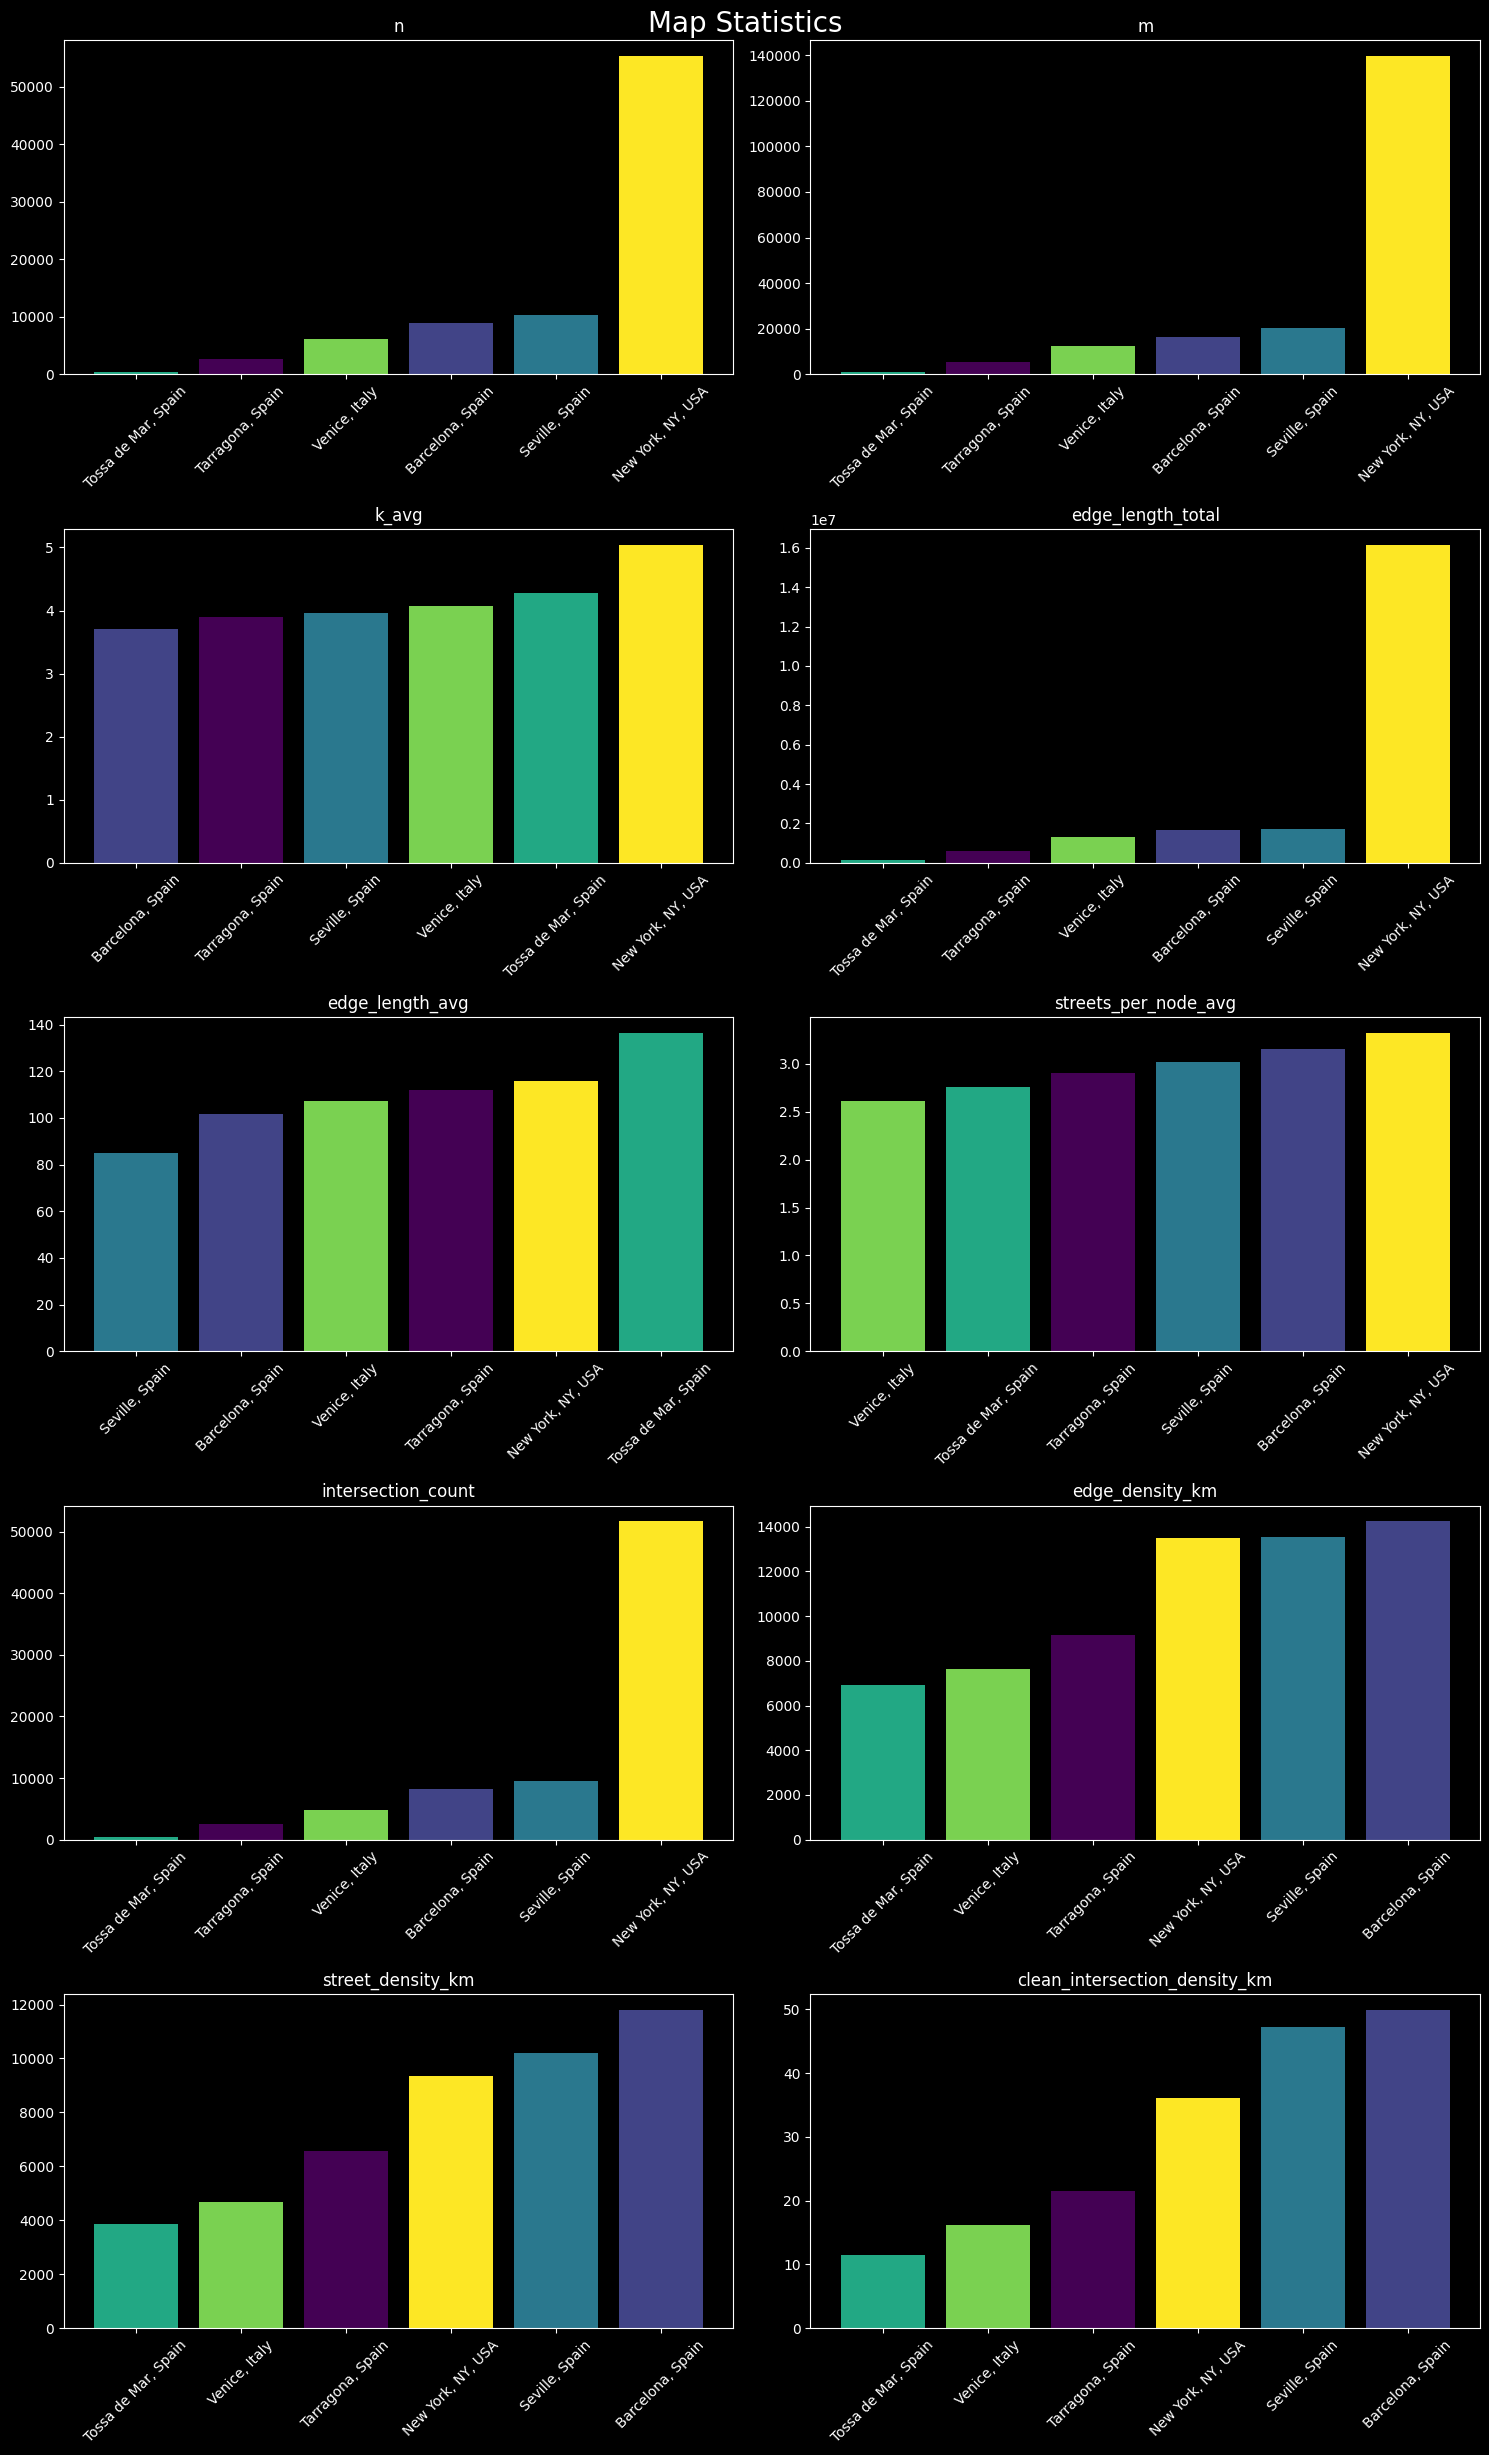

In [54]:
columns = ['n', 'm', 'k_avg', 'edge_length_total', 'edge_length_avg', 'streets_per_node_avg', 'intersection_count', 'edge_density_km', 'street_density_km', 'clean_intersection_density_km']

colors = plt.cm.viridis(np.linspace(0, 1, len(df)))
color_dict = dict(zip(df.index, colors))

fig, axs = plt.subplots(len(columns) // 2, 2, figsize=(15, 25))
for ax, col in zip(axs.flatten(), columns):
    sorted_df = df.sort_values(by=col)
    ax.bar(sorted_df.index, sorted_df[col], color=[color_dict[i] for i in sorted_df.index])
    ax.set_title(col)
    ax.set_xticks(sorted_df.index)
    ax.set_xticklabels(sorted_df.index, rotation=45)
fig.suptitle('Map Statistics', fontsize=20)
plt.tight_layout()
plt.show()
